<a href="https://colab.research.google.com/github/rabnawaz172/ET/blob/main/ET_taif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files

# Use the following command to upload a file from your computer
uploaded = files.upload()

Saving ET_Riaz_5.csv to ET_Riaz_5.csv


In [5]:
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy
from sklearn.tree import DecisionTreeRegressor


In [6]:
import pandas as pd

# Assuming you uploaded a CSV file named 'my_dataset.csv'
file_name = 'ET_Riaz_5.csv'

# Read the uploaded CSV file into a DataFrame
df = pd.read_csv(file_name)

# Now, you can work with the DataFrame 'df' as you would with any other pandas DataFrame.

sns.set_theme(style="white", font_scale=1.5)
# Load the example planets dataset
df1=df.drop(['Day','Month','Year'],axis=1)
column_order = ['Tx', 'Tn', 'RH', 'u(x)', 'Rs', 'e(a)', 'e(s)', 'u2', 'Ra', 'n', 'N', 'Rnl', 'Rn', 'ETo']
df1 = df1[column_order]
df1


,Tx,Tn,RH,u(x),Rs,e(a),e(s),u2,Ra,n,N,Rnl,Rn,ETo
0,22.5,3.3,22.6,1.79,17.38,0.336,1.750,1.79,22.98,10.48,10.48,8.47,4.92,3.5
1,22.1,5.2,33.9,2.51,17.67,0.530,1.772,2.51,23.03,10.49,10.49,7.94,5.57,3.9
2,22.6,5.4,44.6,4.12,16.51,0.713,1.820,4.12,23.08,9.76,10.49,6.82,5.90,4.5
3,20.5,6.3,51.7,1.36,16.48,0.795,1.683,1.36,23.14,9.71,10.50,6.51,6.18,2.6
4,20.6,5.2,41.1,2.48,15.71,0.612,1.656,2.48,23.20,8.98,10.51,6.46,5.64,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8120,27.5,14.0,61.7,1.76,23.64,1.511,2.635,1.76,35.08,10.29,12.13,5.20,13.00,4.7
8121,27.0,11.5,51.1,2.09,24.36,1.141,2.461,2.09,35.22,10.74,12.16,6.00,12.76,5.1
8122,27.6,10.9,40.5,1.85,24.81,0.904,2.498,1.85,35.37,11.00,12.18,6.65,12.45,5.3
8123,29.8,12.5,42.8,2.95,22.98,1.074,2.822,2.95,35.51,9.69,12.21,5.74,11.96,6.2


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [8]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
df3=df1.drop(['Tx', 'Tn', 'RH', 'u(x)', 'Rs', 'e(a)', 'e(s)', 'u2', 'Ra', 'n', 'N', 'Rnl', 'Rn'],axis=1)
y=df3
y
X=df1.drop(['ETo'],axis=1)
X


,Tx,Tn,RH,u(x),Rs,e(a),e(s),u2,Ra,n,N,Rnl,Rn
0,22.5,3.3,22.6,1.79,17.38,0.336,1.750,1.79,22.98,10.48,10.48,8.47,4.92
1,22.1,5.2,33.9,2.51,17.67,0.530,1.772,2.51,23.03,10.49,10.49,7.94,5.57
2,22.6,5.4,44.6,4.12,16.51,0.713,1.820,4.12,23.08,9.76,10.49,6.82,5.90
3,20.5,6.3,51.7,1.36,16.48,0.795,1.683,1.36,23.14,9.71,10.50,6.51,6.18
4,20.6,5.2,41.1,2.48,15.71,0.612,1.656,2.48,23.20,8.98,10.51,6.46,5.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8120,27.5,14.0,61.7,1.76,23.64,1.511,2.635,1.76,35.08,10.29,12.13,5.20,13.00
8121,27.0,11.5,51.1,2.09,24.36,1.141,2.461,2.09,35.22,10.74,12.16,6.00,12.76
8122,27.6,10.9,40.5,1.85,24.81,0.904,2.498,1.85,35.37,11.00,12.18,6.65,12.45
8123,29.8,12.5,42.8,2.95,22.98,1.074,2.822,2.95,35.51,9.69,12.21,5.74,11.96


In [162]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming you have already defined df1, df3, X, and y...

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert the y_train and y_test DataFrames to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create models
random_forest_model = RandomForestRegressor()
xgb_model = XGBRegressor()
lgbm_model = LGBMRegressor()
decision_tree_model = DecisionTreeRegressor()

# Define the number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# Create a dictionary to store results for each model
results = {}

# Convert X_train to a NumPy array to simplify indexing
X_train_np = X_train.to_numpy()

# Perform 10-fold cross-validation for each model
for model_name, model in [('DTR-X$_N$', decision_tree_model),('RFR-X$_N$', random_forest_model), ('XGBR-X$_N$', xgb_model), ('LGBMR-X$_N$', lgbm_model) ]:
    mse_scores = []
    r2_scores = []
    rmse_scores = []
    mae_scores = []

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_val_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)
        rmse_scores.append(rmse)
        mae_scores.append(mae)

    # Store results for the current model
    results[model_name] = {
        'MSE': mse_scores,
        'R2': r2_scores,
        'RMSE': rmse_scores,
        'MAE': mae_scores
    }

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Mean MSE: {np.mean(metrics['MSE']):.3f}")
    print(f"Mean R2: {np.mean(metrics['R2']):.3f}")
    print(f"Mean RMSE: {np.mean(metrics['RMSE']):.3f}")
    print(f"Mean MAE: {np.mean(metrics['MAE']):.3f}")
    print("\n")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 7.240462
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3192
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 7.235094
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3195
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start traini

<ipython-input-163-442c8219051d>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Score", data=metric_df, ax=axes[row, col], palette="Set2")
<ipython-input-163-442c8219051d>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Score", data=metric_df, ax=axes[row, col], palette="Set2")
<ipython-input-163-442c8219051d>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Score", data=metric_df, ax=axes[row, col], palette="Set2")
<ipython-input-163-442c8219051d>:22: FutureWarning: 

Passing `palette` without

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

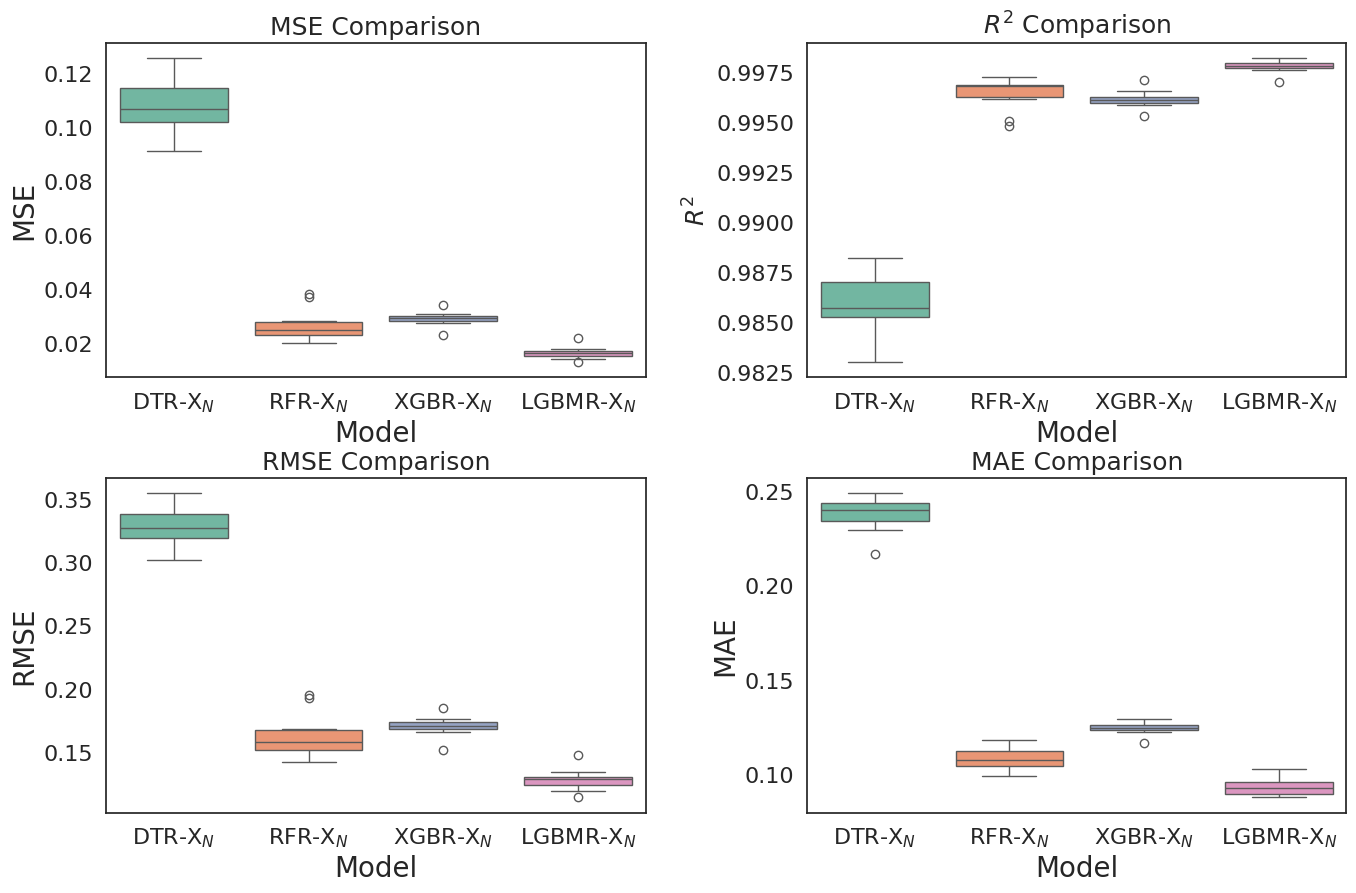

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust vertical and horizontal spacing

# Loop through metrics and assign each subplot
metrics_to_compare = ['MSE', 'R2', 'RMSE', 'MAE']
for i, metric in enumerate(metrics_to_compare):
    row, col = i // 2, i % 2  # Calculate the row and column index

    # Create a DataFrame for the current metric
    data = []
    for model_name, scores in results.items():
        data.extend({'Model': model_name, 'Metric': metric, 'Score': score} for score in scores[metric])

    metric_df = pd.DataFrame(data)

    # Plot using Seaborn
    sns.boxplot(x="Model", y="Score", data=metric_df, ax=axes[row, col], palette="Set2")
    axes[row, col].set_title(f'{metric} Comparison', fontsize=18)
    axes[row, col].set_xlabel('Model', fontsize=20)
    axes[row, col].set_ylabel(metric, fontsize=20)


    # Increase tick label font size
    axes[row, col].tick_params(axis='both', which='major', labelsize=16)

# Use LaTeX formatting for R²
axes[0, 1].set_title(r'$R^2$ Comparison', fontsize=18)
axes[0, 1].set_ylabel(r'$R^2$', fontsize=18)

# Save the plot as an image file with 400 DPI resolution
plt.savefig("model_comparison_plot.png", dpi=400, bbox_inches="tight")

# Download the plot from Colab
from google.colab import files
files.download("model_comparison_plot.png")

# Show the plot
plt.show()


<ipython-input-170-3769e84716c9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")


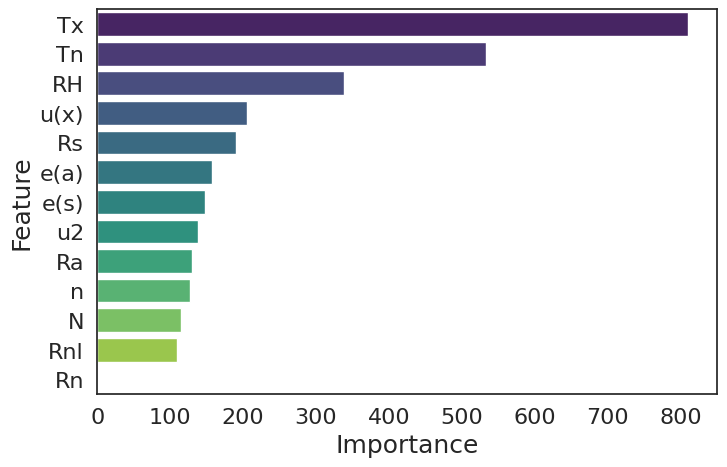

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [170]:
# Get feature importance scores
feature_importance = lgbm_model.feature_importances_

# Get feature names from the original DataFrame (assuming you have it)
feature_names = X_train.columns

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")

plt.xlabel("Importance",fontsize=18)
plt.ylabel("Feature",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
plt.savefig("model_features.png", dpi=300, bbox_inches="tight")

# Download the saved image file from Colab
files.download("model_features.png")


In [168]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the LGBM Regressor model (you can adjust hyperparameters)
lgbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=0)

# Fit the model to the training data
lgbm_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = lgbm_model.feature_importances_

# Get feature names from the original DataFrame (assuming you have it)
feature_names = X_train.columns

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# List to store selected features incrementally
selected_features = []

# Lists to store evaluation metric results
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []   # Add MSE scores

# Train the model incrementally with the top important features
for _, row in feature_importance_df.iterrows():
    selected_features.append(row['Feature'])
    X_train_selected = X_train[selected_features]

    # Fit the model on selected features
    lgbm_model.fit(X_train_selected, y_train)

    # Make predictions on the testing data
    y_pred = lgbm_model.predict(X_test[selected_features])

    # Calculate RMSE, R-squared (R2), MAE, and MAPE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Append results to the respective lists
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)    # Append MSE scores

# Print results for each incremental feature set
for i, (feature, rmse, r2, mae,  mse) in enumerate(zip(selected_features, rmse_scores, r2_scores, mae_scores,  mse_scores), start=1):
    print(f"Features selected: {i}")
    print(f"Selected Feature: {feature}")
    print(f"RMSE: {rmse}")
    print(f"R-squared (R2): {r2}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape:.2f}%")  # Display MAPE as a percentage
    print(f"MSE: {mse}")
    print("\n")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 13
[LightGBM] [Info] Start training from score 7.244554
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 1
[LightGBM] [Info] Start training from score 7.244554
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 2
[LightGBM] [Info] Start training f

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

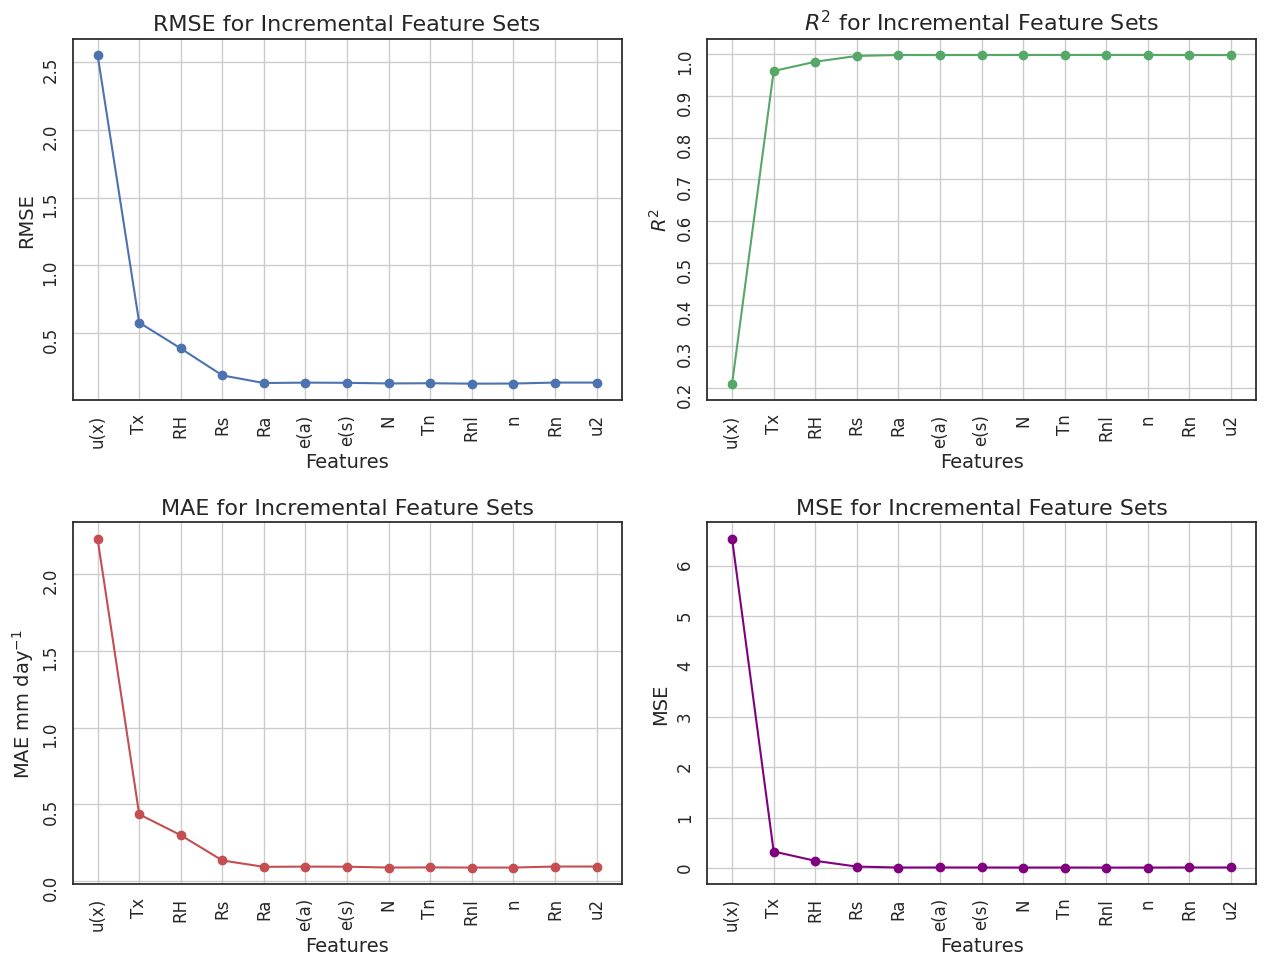

In [177]:
import matplotlib.pyplot as plt

# Increase the font size for better readability
plt.rcParams.update({'font.size': 18})

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(13, 10))

# Plot RMSE for each incremental feature set
axs[0, 0].plot(selected_features, rmse_scores, marker='o', linestyle='-', color='b')
axs[0, 0].set_title('RMSE for Incremental Feature Sets', fontsize=16)  # Increase title font size
axs[0, 0].set_xlabel('Features', fontsize=14)  # Increase x-axis label font size
axs[0, 0].set_ylabel('RMSE', fontsize=14)  # Increase y-axis label font size
axs[0, 0].tick_params(axis='x', rotation=90, labelsize=12)  # Increase tick label font size
axs[0, 0].tick_params(axis='y', rotation=90, labelsize=12)  # Increase tick label font size
axs[0, 0].grid(True)

# Plot R-squared (R²) for each incremental feature set with superscript
axs[0, 1].plot(selected_features, r2_scores, marker='o', linestyle='-', color='g')
axs[0, 1].set_title('$R^2$ for Incremental Feature Sets', fontsize=16)
axs[0, 1].set_xlabel('Features', fontsize=14)
axs[0, 1].set_ylabel('$R^2$', fontsize=14)
axs[0, 1].tick_params(axis='x', rotation=90, labelsize=12)
axs[0, 1].tick_params(axis='y', rotation=90, labelsize=12)
axs[0, 1].grid(True)

# Plot MAE for each incremental feature set
axs[1, 0].plot(selected_features, mae_scores, marker='o', linestyle='-', color='r')
axs[1, 0].set_title('MAE for Incremental Feature Sets', fontsize=16)
axs[1, 0].set_xlabel('Features', fontsize=14)
axs[1, 0].set_ylabel('MAE mm day$^{-1}$', fontsize=14)
axs[1, 0].tick_params(axis='x', rotation=90, labelsize=12)
axs[1, 0].tick_params(axis='y', rotation=90, labelsize=12)
axs[1, 0].grid(True)

# Plot MAPE for each incremental feature set
axs[1, 1].plot(selected_features, mse_scores, marker='o', linestyle='-', color='purple')
axs[1, 1].set_title('MSE for Incremental Feature Sets', fontsize=16)
axs[1, 1].set_xlabel('Features', fontsize=14)
axs[1, 1].set_ylabel('MSE', fontsize=14)
axs[1, 1].tick_params(axis='x', rotation=90, labelsize=12)
axs[1, 1].tick_params(axis='y', rotation=90, labelsize=12)
axs[1, 1].grid(True)

# Adjust the layout to avoid overlapping titles
plt.tight_layout()
plt.savefig('correlation_plot_500dpi.png', dpi=500)

# Download the saved figure from Colab
files.download('correlation_plot_500dpi.png')
# Show the plots
plt.show()

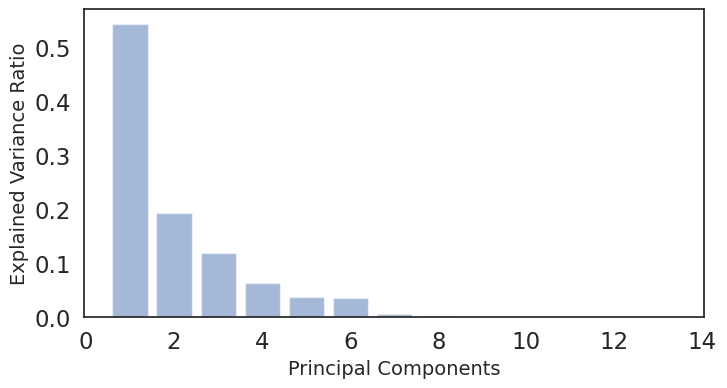

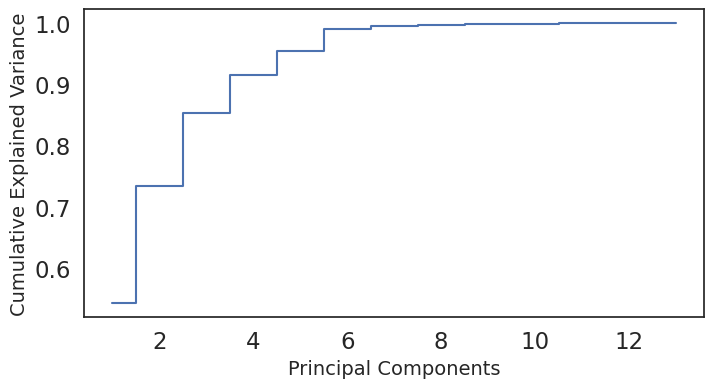

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame 'X' with all your features
# First, you should standardize the data (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with the number of components you want
pca = PCA(n_components=len(X.columns))  # You can reduce this number based on your needs

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Increase font size of labels and ticks
plt.rcParams.update({'font.size': 8})

# Plot Explained Variance Ratio
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components',fontsize=14)
plt.ylabel('Explained Variance Ratio',fontsize=14)


# Save the figure to your hard disk
plt.savefig('explained_variance_ratio.png', bbox_inches='tight', dpi=300)

# Plot Cumulative Explained Variance
plt.figure(figsize=(8, 4))
plt.step(range(1, len(explained_variance_ratio) + 1), cumulative_variance, where='mid')
plt.xlabel('Principal Components',fontsize=14)
plt.ylabel('Cumulative Explained Variance',fontsize=14)


# Save the figure to your hard disk
plt.savefig('cumulative_explained_variance.png', bbox_inches='tight', dpi=300)

# Show the plots
plt.show()

# Optionally, you can also download the figures using Python code:
from google.colab import files

# Download the Explained Variance Ratio plot
files.download('explained_variance_ratio.png')

# Download the Cumulative Explained Variance plot
files.download('cumulative_explained_variance.png')


In [152]:
# Create a PCA instance
pca = PCA()

# Fit the PCA model to your training data
pca.fit(X_train)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance_ratio >= 1) + 1  # Add 1 because indexing starts from 0

# Print the number of components required for 95% variance
print(f'Number of components required for 100% variance: {n_components_95}')

# Transform your data using the selected number of components
X_train_pca_95 = pca.transform(X_train)[:, :n_components_95]
X_test_pca_95 = pca.transform(X_test)[:, :n_components_95]

# Determine the number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.99) + 1  # Add 1 because indexing starts from 0

# Print the number of components required for 95% variance
print(f'Number of components required for 99% variance: {n_components_95}')

# Transform your data using the selected number of components
X_train_pca_95 = pca.transform(X_train)[:, :n_components_95]
X_test_pca_95 = pca.transform(X_test)[:, :n_components_95]

n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # Add 1 because indexing starts from 0

# Print the number of components required for 95% variance
print(f'Number of components required for 95% variance: {n_components_95}')

# Transform your data using the selected number of components
X_train_pca_95 = pca.transform(X_train)[:, :n_components_95]
X_test_pca_95 = pca.transform(X_test)[:, :n_components_95]

n_components_95 = np.argmax(cumulative_variance_ratio >= 0.90) + 1  # Add 1 because indexing starts from 0

# Print the number of components required for 95% variance
print(f'Number of components required for 90% variance: {n_components_95}')

# Transform your data using the selected number of components
X_train_pca_95 = pca.transform(X_train)[:, :n_components_95]
X_test_pca_95 = pca.transform(X_test)[:, :n_components_95]

n_components_95 = np.argmax(cumulative_variance_ratio >= 0.80) + 1  # Add 1 because indexing starts from 0

# Print the number of components required for 95% variance
print(f'Number of components required for 85% variance: {n_components_95}')

# Transform your data using the selected number of components
X_train_pca_95 = pca.transform(X_train)[:, :n_components_95]
X_test_pca_95 = pca.transform(X_test)[:, :n_components_95]

Number of components required for 100% variance: 12
Number of components required for 99% variance: 4
Number of components required for 95% variance: 3
Number of components required for 90% variance: 2
Number of components required for 85% variance: 1


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 7.240462
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3192
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 7.235094
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3195
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start traini

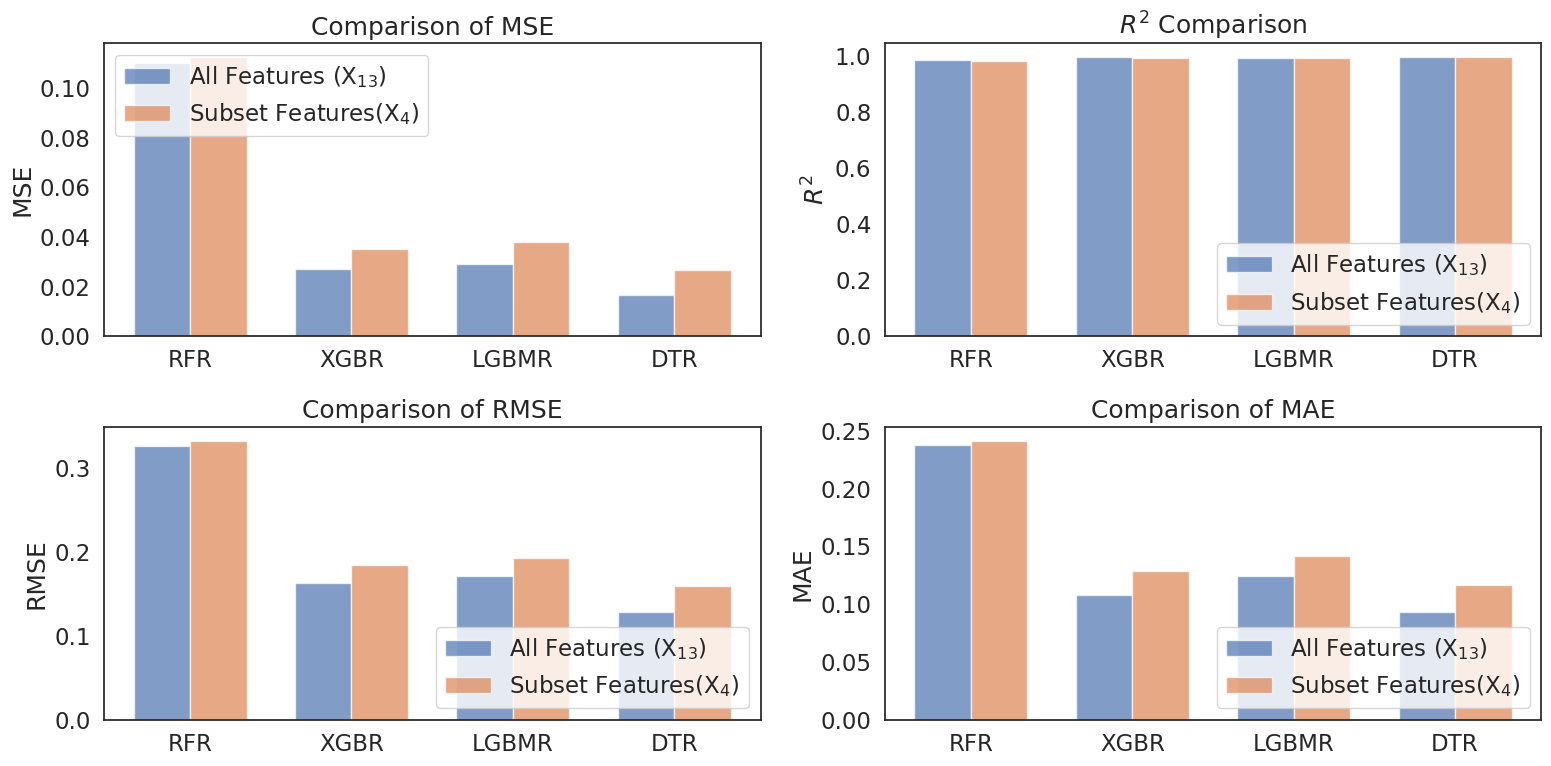

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# Assuming you have already defined df, X, and y...

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert the y_train and y_test DataFrames to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create models
random_forest_model = RandomForestRegressor()
xgb_model = XGBRegressor()
lgbm_model = LGBMRegressor()
decision_tree_model = DecisionTreeRegressor()

# Define the number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# List of metrics to plot
metrics_names = ['MSE', 'R2', 'RMSE', 'MAE']

# Create a 2x2 grid for plots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

# Create separate bars for full vs. subset features for each metric
for i, metric in enumerate(metrics_names):
    row, col = divmod(i, 2)  # Calculate the row and column index
    ax = axes[row, col]  # Select the appropriate subplot

    # Create a list to store metric values for full and subset features
    full_features_values = []
    subset_features_values = []

    # Perform 10-fold cross-validation for each model with all features
    for model_name, model in [ ('DT-X$_4$', decision_tree_model),('EFR-X$_4$', random_forest_model), ('XGBR-X$_4$', xgb_model), ('LGBMR-X$_4$', lgbm_model)]:
        mse_scores = []
        r2_scores = []
        rmse_scores = []
        mae_scores = []

        for train_index, val_index in kf.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_val_pred = model.predict(X_val_fold)

            mse = mean_squared_error(y_val_fold, y_val_pred)
            r2 = r2_score(y_val_fold, y_val_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_val_fold, y_val_pred)

            mse_scores.append(mse)
            r2_scores.append(r2)
            rmse_scores.append(rmse)
            mae_scores.append(mae)

        # Calculate the mean metric value for full features
        full_features_value = np.mean(eval(metric.lower() + '_scores'))

        # Train models with only the subset of features 'u(x)', 'Tx', 'RH'
        X_subset = df[['u(x)', 'Tx', 'RH','Rs']]  # Subset of features: 'u(x)', 'Tx', 'RH'
        y = df['ETo']  # Target: 'ETo'

        # Split the data into training and testing sets (e.g., 80% train, 20% test)
        X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y, test_size=0.2, random_state=0)

        # Convert the y_train and y_test DataFrames to 1D arrays
        y_train_subset = y_train_subset.values.ravel()
        y_test_subset = y_test_subset.values.ravel()

        # Perform 10-fold cross-validation for each model with the subset of features
        for train_index, val_index in kf.split(X_train_subset):
            X_train_fold, X_val_fold = X_train_subset.iloc[train_index], X_train_subset.iloc[val_index]
            y_train_fold, y_val_fold = y_train_subset[train_index], y_train_subset[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_val_pred = model.predict(X_val_fold)

            mse = mean_squared_error(y_val_fold, y_val_pred)
            r2 = r2_score(y_val_fold, y_val_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_val_fold, y_val_pred)

            mse_scores.append(mse)
            r2_scores.append(r2)
            rmse_scores.append(rmse)
            mae_scores.append(mae)

        # Calculate the mean metric value for subset features
        subset_features_value = np.mean(eval(metric.lower() + '_scores'))

        # Append the metric values to the lists
        full_features_values.append(full_features_value)
        subset_features_values.append(subset_features_value)

    # Create separate bars for full vs. subset features for the current metric
    x = np.arange(len(full_features_values))
    width = 0.35
    ax.bar(x - width/2, full_features_values, width, label='All Features (X$_{13}$)', align='center', alpha=0.7)
    ax.bar(x + width/2, subset_features_values, width, label='Subset Features(X$_{4}$)', align='center', alpha=0.7)
    ax.set_ylabel(metric)
    ax.set_title(f'Comparison of {metric}')
    ax.set_xticks(x)
    ax.set_xticklabels(['RFR', 'XGBR', 'LGBMR', 'DTR'])
    ax.legend(loc='lower right')  # Moved the legend to the lower left

axes[0, 1].set_title(r'$R^2$ Comparison', fontsize=18)
axes[0, 1].set_ylabel(r'$R^2$', fontsize=18)
axes[0, 0].legend(loc='upper left')
plt.tight_layout()
plt.savefig('final_comparison_plot.png', dpi=400)  # Save the figure with 400 dpi
plt.show()

# Download the saved figure from Colab
from google.colab import files
files.download('final_comparison_plot.png')

Mean MSE (DTR - Full Features): 0.110
Mean MSE (DTR - Subset Features): 0.112
Mean MSE (RFR - Full Features): 0.027
Mean MSE (RFR - Subset Features): 0.035
Mean MSE (XGBR - Full Features): 0.029
Mean MSE (XGBR - Subset Features): 0.038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 7.240462
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3192
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 7.235094
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing 

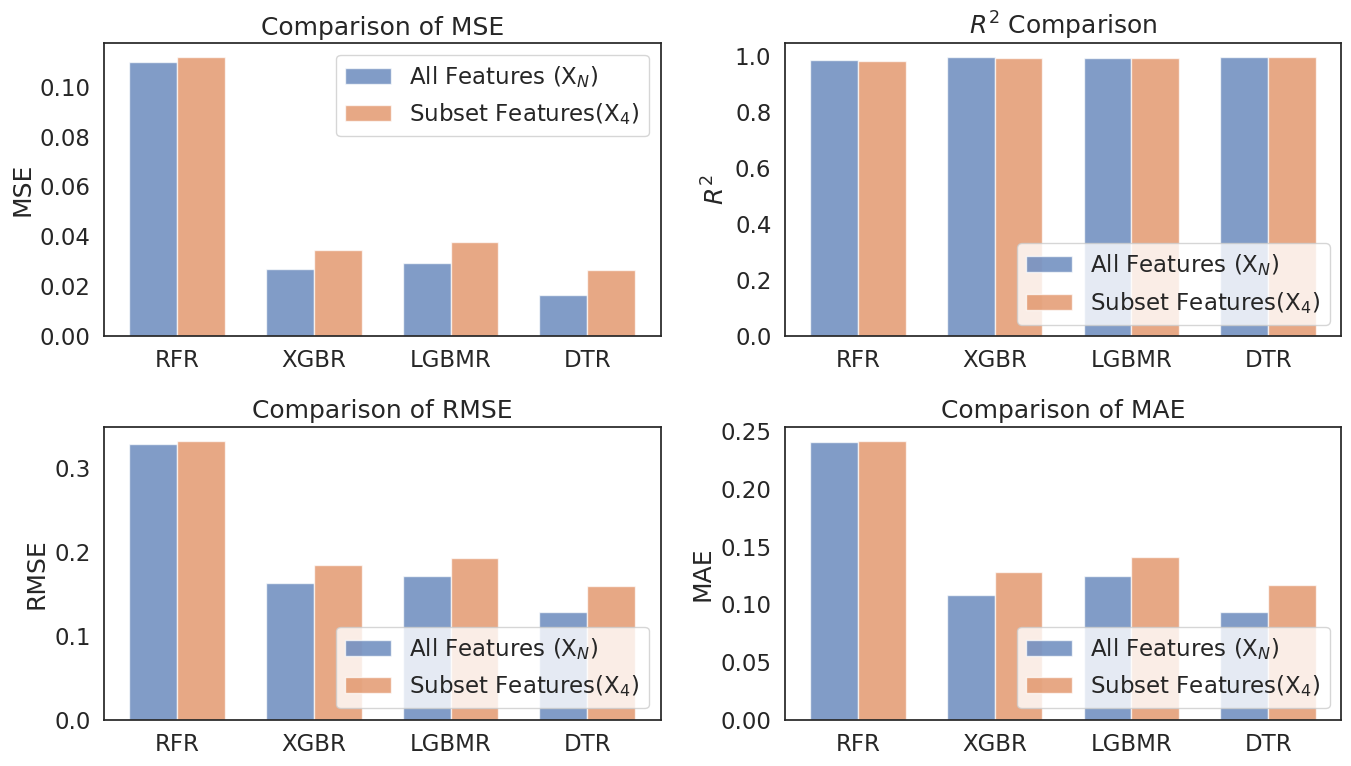

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# Assuming you have already defined df, X, and y...

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert the y_train and y_test DataFrames to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create models
random_forest_model = RandomForestRegressor()
xgb_model = XGBRegressor()
lgbm_model = LGBMRegressor()
decision_tree_model = DecisionTreeRegressor()

# Define the number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# List of metrics to plot
metrics_names = ['MSE', 'R2', 'RMSE', 'MAE']

# Create a 2x2 grid for plots
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.subplots_adjust(hspace=0.5)

# Create separate bars for full vs. subset features for each metric
for i, metric in enumerate(metrics_names):
    row, col = divmod(i, 2)  # Calculate the row and column index
    ax = axes[row, col]  # Select the appropriate subplot

    # Create a list to store metric values for full and subset features
    full_features_values = []
    subset_features_values = []

    for model_name, model in [('DTR', decision_tree_model), ('RFR', random_forest_model), ('XGBR', xgb_model), ('LGBMR', lgbm_model)]:
        mse_scores = []
        r2_scores = []
        rmse_scores = []
        mae_scores = []

        for train_index, val_index in kf.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_val_pred = model.predict(X_val_fold)

            mse = mean_squared_error(y_val_fold, y_val_pred)
            r2 = r2_score(y_val_fold, y_val_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_val_fold, y_val_pred)

            mse_scores.append(mse)
            r2_scores.append(r2)
            rmse_scores.append(rmse)
            mae_scores.append(mae)

        # Calculate the mean metric value for full features
        full_features_value = np.mean(eval(metric.lower() + '_scores'))

        # Train models with only the subset of features 'u(x)', 'Tx', 'RH'
        X_subset = df[['u(x)', 'Tx', 'RH', 'Rs']]  # Subset of features: 'u(x)', 'Tx', 'RH'
        y = df['ETo']  # Target: 'ETo'

        # Split the data into training and testing sets (e.g., 80% train, 20% test)
        X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y, test_size=0.2, random_state=0)

        # Convert the y_train and y_test DataFrames to 1D arrays
        y_train_subset = y_train_subset.values.ravel()
        y_test_subset = y_test_subset.values.ravel()

        # Perform 10-fold cross-validation for each model with the subset of features
        for train_index, val_index in kf.split(X_train_subset):
            X_train_fold, X_val_fold = X_train_subset.iloc[train_index], X_train_subset.iloc[val_index]
            y_train_fold, y_val_fold = y_train_subset[train_index], y_train_subset[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_val_pred = model.predict(X_val_fold)

            mse = mean_squared_error(y_val_fold, y_val_pred)
            r2 = r2_score(y_val_fold, y_val_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_val_fold, y_val_pred)

            mse_scores.append(mse)
            r2_scores.append(r2)
            rmse_scores.append(rmse)
            mae_scores.append(mae)

        # Calculate the mean metric value for subset features
        subset_features_value = np.mean(eval(metric.lower() + '_scores'))

        # Append the metric values to the lists
        full_features_values.append(full_features_value)
        subset_features_values.append(subset_features_value)

        # Print mean metric values for each model
        print(f"Mean {metric} ({model_name} - Full Features): {np.mean(full_features_value):.3f}")
        print(f"Mean {metric} ({model_name} - Subset Features): {np.mean(subset_features_value):.3f}")

    # Create separate bars for full vs. subset features for the current metric
    x = np.arange(len(full_features_values))
    width = 0.35
    ax.bar(x - width/2, full_features_values, width, label='All Features (X$_{N}$)', align='center', alpha=0.7)
    ax.bar(x + width/2, subset_features_values, width, label='Subset Features(X$_{4}$)', align='center', alpha=0.7)
    ax.set_ylabel(metric)
    ax.set_title(f'Comparison of {metric}')
    ax.set_xticks(x)
    ax.set_xticklabels(['RFR', 'XGBR', 'LGBMR', 'DTR'])
    ax.legend(loc='lower right')  # Moved the legend to the lower left

axes[0, 1].set_title(r'$R^2$ Comparison', fontsize=18)
axes[0, 1].set_ylabel(r'$R^2$', fontsize=18)
axes[0, 0].legend(loc='upper right')
plt.tight_layout()
plt.savefig('final_comparison_plot.png', dpi=400)  # Save the figure with 400 dpi
plt.show()

# Download the saved figure from Colab
from google.colab import files
files.download('final_comparison_plot.png')




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 13
[LightGBM] [Info] Start training from score 7.244554
Mean Squared Error (MSE): 0.018215086334977235
R-squared (R2): 0.997796943310868
Spearman Correlation: 1.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

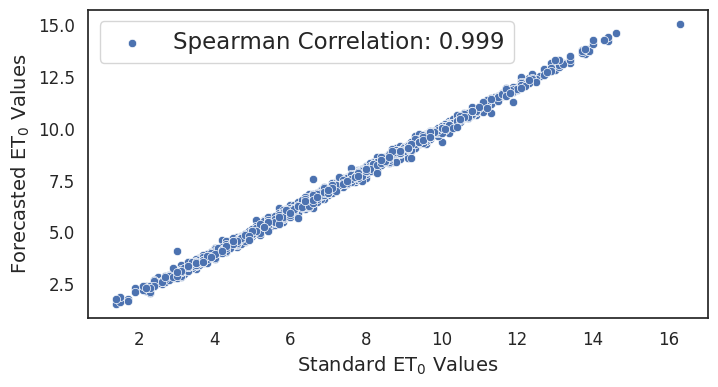

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import spearmanr
import pandas as pd

# Assuming you have already defined df, X, and y...

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an LGBMRegressor model
lgbm_model = LGBMRegressor()

# Train the LGBMRegressor model with all features
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_model.predict(X_test)

# Calculate Spearman correlation coefficient
spearman_corr, _ = spearmanr(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Spearman Correlation: {spearman_corr:.2f}')

# Create a correlation plot between predicted and actual values with the legend
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=y_pred, label=f'Spearman Correlation: {0.999:.3f}')

plt.xlabel('Standard ET$_0$ Values',fontsize=14)
plt.ylabel('Forecasted ET$_0$ Values',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig('correlation_plot_500dpi.png', dpi=500)

# Download the saved figure from Colab
files.download('correlation_plot_500dpi.png')
plt.show()




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 4
[LightGBM] [Info] Start training from score 7.244554
Mean Squared Error (MSE): 0.03531861245584839
R-squared (R2): 0.9957283262900432
Spearman Correlation: 1.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

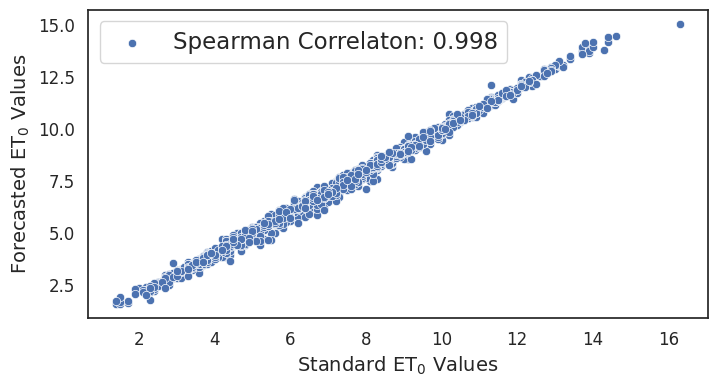

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import spearmanr
import pandas as pd

# Assuming you have already defined df, X, and y...
X_subset = df[['u(x)', 'Tx', 'RH','Rs']]  # Subset of features: 'u(x)', 'Tx', 'RH'
y = df['ETo']  # Target: 'ETo'
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=0)

# Create an LGBMRegressor model
lgbm_model = LGBMRegressor()

# Train the LGBMRegressor model with all features
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_model.predict(X_test)

# Calculate Spearman correlation coefficient
spearman_corr, _ = spearmanr(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Spearman Correlation: {spearman_corr:.2f}')

# Create a correlation plot between predicted and actual values with the legend
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=y_pred, label=f'Spearman Correlaton: {spearman_corr:.3f}')

plt.xlabel('Standard ET$_0$ Values',fontsize=14)
plt.ylabel('Forecasted ET$_0$ Values',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig('correlation_plot_500dpi.png', dpi=500)

# Download the saved figure from Colab
files.download('correlation_plot_500dpi.png')
plt.show()

plt.show()

